In [ ]:
# Please add the dataset download code here
!gdown --id 1gkUyLeI5ly1wBiXkdfGZDKQZLt3gcwCq
!unzip "LUMS_FALL2020_PROJECT_DATA.zip" -d ""

Downloading...
From: https://drive.google.com/uc?id=1gkUyLeI5ly1wBiXkdfGZDKQZLt3gcwCq
To: /content/LUMS_FALL2020_PROJECT_DATA.zip
802MB [00:16, 47.3MB/s]
Archive:  LUMS_FALL2020_PROJECT_DATA.zip
   creating: Gender_Recognition/Test/
   creating: Gender_Recognition/Test/SPK083_M/
  inflating: Gender_Recognition/Test/SPK083_M/1.wav  
  inflating: Gender_Recognition/Test/SPK083_M/10.wav  
  inflating: Gender_Recognition/Test/SPK083_M/2.wav  
  inflating: Gender_Recognition/Test/SPK083_M/3.wav  
  inflating: Gender_Recognition/Test/SPK083_M/4.wav  
  inflating: Gender_Recognition/Test/SPK083_M/5.wav  
  inflating: Gender_Recognition/Test/SPK083_M/6.wav  
  inflating: Gender_Recognition/Test/SPK083_M/7.wav  
  inflating: Gender_Recognition/Test/SPK083_M/8.wav  
  inflating: Gender_Recognition/Test/SPK083_M/9.wav  
   creating: Gender_Recognition/Test/SPK084_M/
  inflating: Gender_Recognition/Test/SPK084_M/1.wav  
  inflating: Gender_Recognition/Test/SPK084_M/10.wav  
  inflating: Gender_Rec

In [ ]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=e8a787d2466f18e2286a6dc764a28aaa01f52cdbb99b8b98c08242b3099a0e5b
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
import python_speech_features as mfcc
from scipy.io.wavfile import read
import numpy as np
import pandas as pd
import glob
import os
from sklearn.metrics import accuracy_score as acc_sc
from sklearn.metrics import multilabel_confusion_matrix as mcm
from sklearn.metrics import classification_report as cr

In [ ]:
# Function definitions 
def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

# snippet used to convert audio to numeric features
'''
sr, audio = read('test.wav')
features = get_MFCC(audio, sr)
'''

"\nsr, audio = read('test.wav')\nfeatures = get_MFCC(audio, sr)\n"

In [ ]:
 import os

#function to read wave files from the directories (like each directory)
def func_read(loc1, dict_is):
  #change directory for directory reading
  os.chdir(loc1)
  filelist = os.listdir()
  path1 = loc1
  dirs = [d for d in os.listdir(path1) if os.path.isdir(d)]
  #print(dirs)

  for dr in dirs:
    loc2 = loc1+'/'+dr
    os.chdir(loc2)
    filelist = os.listdir()
    path2 = loc2
    files = [f for f in os.listdir(path2) if os.path.isfile(f)]
    dict_is[dr] = files
  
  return dict_is


In [ ]:
# read the wave files for speaker rec. train set
loc = '/content/Speaker_Recognition/Train'
spk_train_files={}
spk_train_files=func_read(loc,spk_train_files )

In [ ]:
# read the wave files for speaker rec. valid set
loc = '/content/Speaker_Recognition/Valid'
spk_valid_files={}
spk_valid_files=func_read(loc,spk_valid_files )

In [ ]:
# read the wave files for speaker rec. test set
loc = '/content/Speaker_Recognition/Test'
spk_test_files={}
spk_test_files=func_read(loc,spk_test_files )

In [ ]:
# read the wave files for gender train set
loc = '/content/Gender_Recognition/Train'
gen_train_files={}
ain_files=func_read(loc,gen_train_files)

In [ ]:
# read the wave files for speaker gender valid set
loc = '/content/Gender_Recognition/Valid'
gen_valid_files={}
gen_valid_files=func_read(loc,gen_valid_files )

In [ ]:
# read the wave files for speaker gender test set
loc = '/content/Gender_Recognition/Test'
gen_test_files={}
gen_test_files=func_read(loc,gen_test_files )

In [ ]:
len(spk_train_files)# 142 directories, each containg 6 files so we'll have 852 total wavefiles

142

In [ ]:
# function to make the feature vector
def func_fv(dic_fv, loc, dic_files):
  for x in dic_files:
    #print('Doing for ', x)
    for y in dic_files[x]:
      #print('Making FV for ', y)
      path = loc + x + '/'+y
      sr,audio = read(path)
      feature = get_MFCC(audio, sr)
      dic_fv[(x,y)] = feature
      #print('Feature Vector Shape: ', feature.shape)
    #print('.......................')
  return dic_fv

In [407]:
#Make the feature vectors for speaker rec. train set
loc = '/content/Speaker_Recognition/Train/'
spk_train_fv={}
spk_train_fv = func_fv(spk_train_fv, loc, spk_train_files)

In [408]:
#Make the feature vectors for speaker rec. Valid set
loc = '/content/Speaker_Recognition/Valid/'
spk_valid_fv={}
spk_valid_fv = func_fv(spk_valid_fv, loc, spk_valid_files)
spkr_valid_num, rec_no = zip(*(list(spk_valid_fv.keys())))

In [409]:
#Make the feature vectors for speaker rec. Test set
loc = '/content/Speaker_Recognition/Test/'
spk_test_fv={}
spk_test_fv = func_fv(spk_test_fv, loc, spk_test_files)
spkr_test_num, rec_no = zip(*(list(spk_test_fv.keys())))

In [410]:
#Make the feature vectors for Gender rec. train set
loc = '/content/Gender_Recognition/Train/'
gen_train_fv={}
gen_train_fv = func_fv(gen_train_fv, loc, gen_train_files)

In [411]:
#Make the feature vectors for Gender rec. valid set
loc = '/content/Gender_Recognition/Valid/'
gen_valid_fv={}
gen_valid_fv = func_fv(gen_valid_fv, loc, gen_valid_files)

In [412]:
#Make the feature vectors for Gender rec. test set
loc = '/content/Gender_Recognition/Test/'
gen_test_fv={}
gen_test_fv = func_fv(gen_test_fv, loc, gen_test_files)

In [413]:
#This is how we can access the feature vector -M
spk_train_fv[('SPK089_M','6.wav')]

spkr_num, rec_no = zip(*(list(spk_train_fv.keys())))

In [ ]:
#This is how we can access the feature vector -M
spk_valid_fv[('SPK138_M','8.wav')]

array([ 13.52474001,   1.98318214,  -8.03346908,  -6.37900533,
        -0.78077534, -17.00876879, -10.04738339,   2.5219221 ,
        -5.83190041,  -4.06472852,  -0.57735597,  -6.38633827,
        -5.58964775])

In [ ]:
#This is how we can access the feature vector -M
spk_valid_fv[('SPK138_M','10.wav')]

array([ 13.17055475,   2.06391151, -12.01237835,  -8.13024705,
        -4.69899005, -16.78921959,  -8.8258159 ,   0.15881221,
        -9.12302017,  -2.00355917,  -1.33070299,  -7.94613226,
        -4.18276678])

In [ ]:
spkr_num, rec_no = zip(*(list(spk_train_fv.keys())))

In [ ]:
# Implementation of Multinomial Regression
# Theta matrix will have columns as number of classes this time.
# X should be n x m i.e n = number of observations and m is number of features that is 13
# Y should be labels and should be m x 2 for gender recognition and m x 142 for speaker recongition
def cross_entropy_loss(X,Y,thetas):
  h_x = softmax(X,thetas)
  J = (np.sum((-Y *np.log(h_x)),axis=1)).mean()
  return J

def softmax(X,thetas):
  h_x = thetas.T @ X.T
  h_x = h_x.T

  #soft = np.zeros((h_x.shape[0],h_x.shape[1]),np.float)
  exp_max = np.exp(h_x- np.max(h_x,axis=-1,keepdims=True))
  out = exp_max/np.sum(exp_max,axis=-1,keepdims=True)

  return out

def gradient_descent(X,Y,n_epochs,alpha):
  thetas = np.zeros((X.shape[1],Y.shape[1]),np.float)
  temp_thetas = np.zeros((X.shape[1],Y.shape[1]),np.float)
  costs = list()
  m = X.shape[0]

  for run in range(n_epochs):
    probs = softmax(X,thetas)
    diff = probs - Y
    dw = (X.T @ diff)/m
    temp_thetas = thetas - (alpha*dw)
    thetas = temp_thetas
    loss = cross_entropy_loss(X,Y,thetas)
    costs.append(loss)
    #print("Loss at iteration:",run,"is: ",loss)
  
  return costs,thetas

def predict(test_X,thetas):
  pred_prob = softmax(test_X,thetas)
  y = np.zeros((pred_prob.shape[0],pred_prob.shape[1]))
  for i in range(test_X.shape[0]):
    y[i][np.argmax(pred_prob[i])] = 1
  
  return y

from sklearn.metrics import f1_score

def one_2_col(gen_num):
  #Male = 1, Female = 0
  gen_lbl = []
  for i in range(len(gen_num)):
    if gen_num[i][-1] == 'M':
      gen_lbl.append(1)
    else:
      gen_lbl.append(0)

  gold_gen_lbl = np.asarray(gen_lbl)
  gold_gen_lbl = np.expand_dims(gold_gen_lbl, axis = 1)
  
  pandas_lbl = pd.DataFrame({"M":gen_lbl})
  temp = pd.get_dummies(pandas_lbl['M'])
  pandas_lbl = pd.concat([pandas_lbl, temp[0]],axis=1)
  pandas_lbl = pandas_lbl.rename(columns={0: "F"})
  numpy_lbl = pandas_lbl.to_numpy()

  return gold_gen_lbl,numpy_lbl

In [435]:
# One-hot labels for Speaker Recognition Train
y_spkr_train_one_hot = np.zeros((len(spk_train_fv),142))
for i in range(len(spk_train_fv)):
  target = int(spkr_num[i].split("_")[0][-3:])
  y_spkr_train_one_hot[i][target - 1] = 1

x_spkr_train = np.array(list(spk_train_fv.values()))
x_spkr_train = np.insert(x_spkr_train,0,1,axis=1) # adding bias feature 1 
x_spkr_train.shape
y_spkr_train_one_hot.shape

(852, 142)

In [436]:
# One-hot labels for Speaker Recognition Valid
y_spkr_valid_one_hot = np.zeros((len(spk_valid_fv),142))
for i in range(len(spk_valid_fv)):
  target = int(spkr_valid_num[i].split("_")[0][-3:])
  y_spkr_valid_one_hot[i][target - 1] = 1

x_spkr_valid = np.array(list(spk_valid_fv.values()))
x_spkr_valid = np.insert(x_spkr_valid,0,1,axis=1) # adding bias feature 1 
x_spkr_valid.shape
y_spkr_valid_one_hot.shape

(284, 142)

In [437]:
# One-hot labels for Speaker Recognition Test
y_spkr_test_one_hot = np.zeros((len(spk_test_fv),142))
for i in range(len(spk_test_fv)):
  target = int(spkr_test_num[i].split("_")[0][-3:])
  y_spkr_test_one_hot[i][target - 1] = 1

x_spkr_test = np.array(list(spk_test_fv.values()))
x_spkr_test = np.insert(x_spkr_test,0,1,axis=1) # adding bias feature 1 
x_spkr_test.shape
y_spkr_test_one_hot.shape

(284, 142)

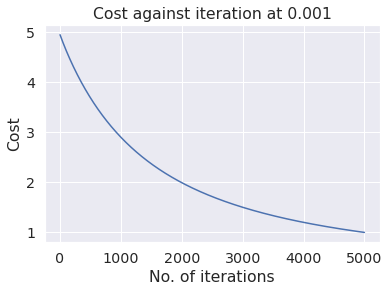

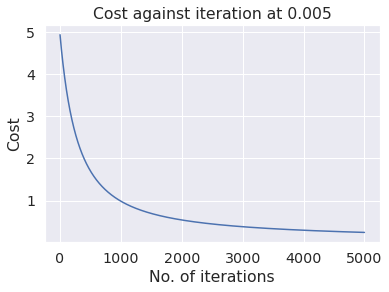

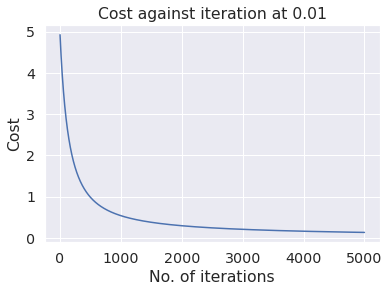

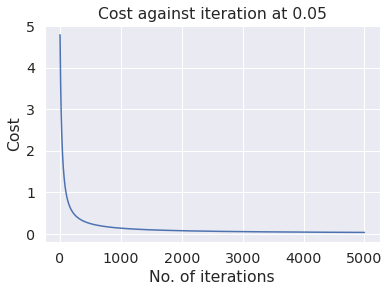

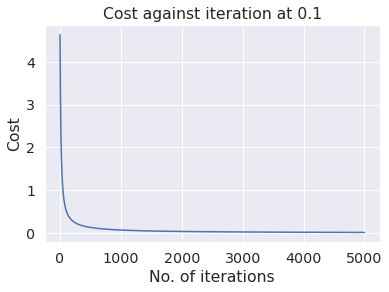

In [469]:
import matplotlib.pyplot as plt

#Implementation of Speaker recognition
alpha_list = [0.001, 0.005, 0.01, 0.05, 0.1]
f1_dict = {}
cost_dict = {}

for alpha in alpha_list:
  cost_spkr, weight_spkr = gradient_descent(x_spkr_train,y_spkr_train_one_hot,5000,alpha)
  f1_dict[alpha] = f1_score(np.argmax(y_spkr_valid_one_hot,axis=1),np.argmax(predict(x_spkr_valid,weight_spkr),axis=1),average='macro')
  cost_dict[alpha] = cross_entropy_loss(x_spkr_valid,y_spkr_valid_one_hot, weight_spkr )
  plt.plot(range(5000),cost_spkr)
  plt.title(f"Cost against iteration at {alpha}")
  plt.ylabel("Cost")
  plt.xlabel("No. of iterations")
  plt.show()

Best Alpha for f1_score: 0.005
Best Alpha for Cost: 0.05


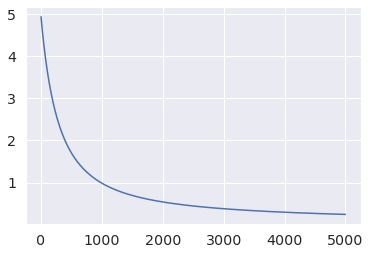

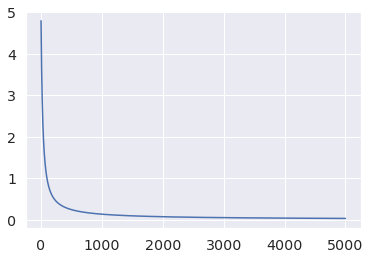

In [470]:
best_alpha_f1 = max(f1_dict,key=f1_dict.get)
best_alpha_cost = min(cost_dict,key=cost_dict.get)

print("Best Alpha for f1_score:",best_alpha_f1)
print("Best Alpha for Cost:",best_alpha_cost)

# Get weights from valid
c_f1, w_spkr_f1 = gradient_descent(x_spkr_train,y_spkr_train_one_hot,5000,best_alpha_f1)
plt.plot(range(5000),c_f1)
plt.show()

c_c, w_spkr_c = gradient_descent(x_spkr_train,y_spkr_train_one_hot,5000,best_alpha_cost)
plt.plot(range(5000),c_c)
plt.show()




In [471]:
print('The classification report, accuracy and confusion matrix using the alpha that gave max f1 score: ')
print(cr(np.argmax(y_spkr_test_one_hot,axis=1),np.argmax(predict(x_spkr_test,w_spkr_f1),axis=1))) 
print(acc_sc(np.argmax(y_spkr_test_one_hot,axis=1),np.argmax(predict(x_spkr_test,w_spkr_f1),axis=1)))
print(mcm(np.argmax(y_spkr_test_one_hot,axis=1),np.argmax(predict(x_spkr_test,w_spkr_f1),axis=1)))

print('------------------------------')

# Evaluate on test using weights 
print('The classification report, accuracy and confusion matrix using the alpha that gave min loss: ')
print(cr(np.argmax(y_spkr_test_one_hot,axis=1),np.argmax(predict(x_spkr_test,w_spkr_c),axis=1))) 
print(acc_sc(np.argmax(y_spkr_test_one_hot,axis=1),np.argmax(predict(x_spkr_test,w_spkr_c),axis=1)))
print(mcm(np.argmax(y_spkr_test_one_hot,axis=1),np.argmax(predict(x_spkr_test,w_spkr_c),axis=1)))

The classification report, accuracy and confusion matrix using the alpha that gave max f1 score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00    

In [ ]:
####################################################################  Gender Recognition #################################################

In [414]:
#Train Y Data
gen_num_train, gen_rec_no_train = zip(*(list(gen_train_fv.keys())))
#Valid Y Data
gen_num_valid, gen_rec_no_valid = zip(*(list(gen_valid_fv.keys())))
#Test Y Data
gen_num_test, gen_rec_no_test = zip(*(list(gen_test_fv.keys())))

In [419]:
#Train X Gender
x_gen_train = np.array(list(gen_train_fv.values()))
x_gen_train = np.insert(x_gen_train,0,1,axis=1) # adding bias feature 1 
x_gen_train.shape
#Train Y Gender
y_one_col_train_gen, y_two_col_train_gen = one_2_col(gen_num_train)
y_gen_train_one_hot = y_two_col_train_gen

In [420]:
x_gen_train.shape

(1080, 14)

In [380]:
#Valid Y Gender
x_gen_valid = np.array(list(gen_valid_fv.values()))
x_gen_valid = np.insert(x_gen_valid,0,1,axis=1) # adding bias feature 1 
x_gen_valid.shape
#Valid Y Gender
y_one_col_valid_gen, y_two_col_valid_gen = one_2_col(gen_num_valid)
y_gen_valid_one_hot = y_two_col_valid_gen

In [381]:
#Test Y Gender
x_gen_test = np.array(list(gen_test_fv.values()))
x_gen_test = np.insert(x_gen_test,0,1,axis=1) # adding bias feature 1 
x_gen_test.shape
#Test Y Gender
y_one_col_test_gen, y_two_col_test_gen = one_2_col(gen_num_test)
y_gen_test_one_hot = y_two_col_test_gen

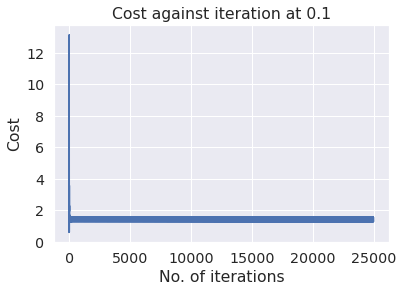

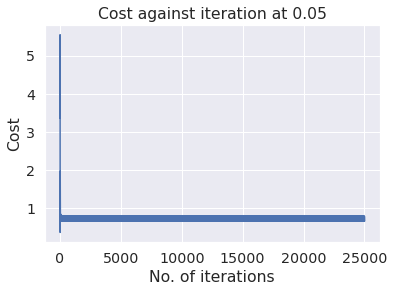

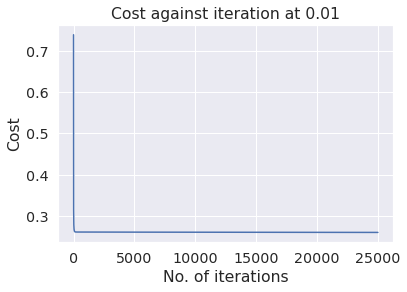

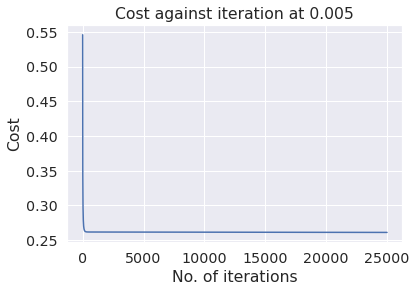

In [468]:
import matplotlib.pyplot as plt

#Implementation of Gender recognition
alpha_list = [0.1, 0.05, 0.01, 0.005]
f1_dict2 = {}
cost_dict2 = {}

for alpha in alpha_list:
  cost_gen, weight_gen = gradient_descent(x_gen_train,y_gen_train_one_hot,25000,alpha)
  f1_dict2[alpha] = f1_score(np.argmax(y_gen_valid_one_hot,axis=1),np.argmax(predict(x_gen_valid,weight_gen),axis=1),average='macro')
  cost_dict2[alpha] = cross_entropy_loss(x_gen_valid,y_gen_valid_one_hot,weight_gen)
  
  plt.plot(range(25000),cost_gen)
  plt.title(f"Cost against iteration at {alpha}")
  plt.ylabel("Cost")
  plt.xlabel("No. of iterations")
  plt.show()

In [467]:
best_alpha_f1_2 = max(f1_dict2,key=f1_dict2.get)
best_alpha_cost_2 = min(cost_dict2,key=cost_dict2.get)

print("Best Cost Alpha:",best_alpha_cost_2)
print("Best f1_score Alpha:",best_alpha_f1_2)

#Best Weights on validation loss
best_cost_gen, w_gen_c2 = gradient_descent(x_gen_train,y_gen_train_one_hot,25000,best_alpha_cost_2)

#Best Weights on Validaion F1
best_cost_gen, w_gen_f1_2 = gradient_descent(x_gen_train,y_gen_train_one_hot,25000,best_alpha_f1_2)


Best Cost Alpha: 0.01
Best f1_score Alpha: 0.1


In [460]:
# Evaluate on test using weights 
print('The classification renp.port, accuracy and confusion matrix using the alpha that gave min loss: ')
print(cr(np.argmax(y_gen_test_one_hot,axis=1),np.argmax(predict(x_gen_test,w_gen_c2),axis=1))) 
print(acc_sc(np.argmax(y_gen_test_one_hot,axis=1),np.argmax(predict(x_gen_test,w_gen_c2),axis=1)))
print(mcm(np.argmax(y_gen_test_one_hot,axis=1),np.argmax(predict(x_gen_test,w_gen_c2),axis=1)))

print('------------------------------')

print('The classification report, accuracy and confusion matrix using the alpha that gave max f1 score: ')
print(cr(np.argmax(y_gen_test_one_hot,axis=1),np.argmax(predict(x_gen_test,w_gen_f1_2),axis=1))) 
print(acc_sc(np.argmax(y_gen_test_one_hot,axis=1),np.argmax(predict(x_gen_test,w_gen_f1_2),axis=1)))
print(mcm(np.argmax(y_gen_test_one_hot,axis=1),np.argmax(predict(x_gen_test,w_gen_f1_2),axis=1)))

The classification renp.port, accuracy and confusion matrix using the alpha that gave min loss: 
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       130
           1       0.60      0.88      0.71        40

    accuracy                           0.84       170
   macro avg       0.78      0.85      0.80       170
weighted avg       0.87      0.84      0.84       170

0.8352941176470589
[[[ 35   5]
  [ 23 107]]

 [[107  23]
  [  5  35]]]
------------------------------
The classification report, accuracy and confusion matrix using the alpha that gave max f1 score: 
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       130
           1       0.61      0.90      0.73        40

    accuracy                           0.84       170
   macro avg       0.79      0.86      0.81       170
weighted avg       0.88      0.84      0.85       170

0.8411764705882353
[[[ 36   4]
  [ 23 107]]

 [[1